### What is the most optimal skills to learn for Data Analysts

# Methodology
1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  


# Loading Data
df= pd.read_csv("data_jobs.csv")

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_Uk = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

In [3]:
df_DA_Uk = df_DA_Uk.dropna(subset=['salary_year_avg'])

df_DA_Uk_exploded = df_DA_Uk.explode('job_skills')
df_DA_Uk_exploded[['salary_year_avg', 'job_skills']].head(5)


,salary_year_avg,job_skills
2602,51014.0,excel
2602,51014.0,word
2602,51014.0,outlook
16526,100500.0,sql
16526,100500.0,jupyter


In [ ]:
df_DA_skills = df_DA_Uk_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_Uk)

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]



df_DA_skills_high_demand


,skill_count,median_salary,skill_percent
job_skills,,,
sql,33,98500.0,45.833333
excel,29,75550.0,40.277778
python,25,89100.0,34.722222
tableau,13,100500.0,18.055556
r,9,77017.5,12.500000
go,9,71000.0,12.500000
sas,8,80007.0,11.111111
power bi,7,89100.0,9.722222
outlook,6,53857.0,8.333333


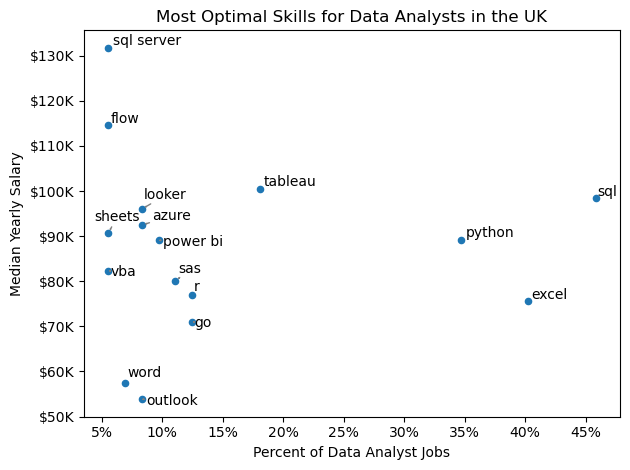

In [20]:
from adjustText import adjust_text
    
df_DA_skills_high_demand .plot(kind='scatter', x='skill_percent', y='median_salary')
    
   # Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
  texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))
    
# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
    
# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the UK')

from matplotlib.ticker import PercentFormatter
ax =plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))


    
# Adjust layout and display plot 
plt.tight_layout()
plt.show()

In [21]:
df['job_type_skills'].head(10)

0                                                  NaN
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object

In [23]:
df_technology = df['job_type_skills'].copy()
# remove duplicates
df_technology = df_technology.drop_duplicates() 
# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value
   # remove duplicates by converting values to set then back to list
    for key, value in technology_dict.items():
        technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['excel',
  'spreadsheet',
  'qlik',
  'nuix',
  'cognos',
  'splunk',
  'spss',
  'sheets',
  'word',
  'tableau',
  'alteryx',
  'outlook',
  'powerbi',
  'ms access',
  'power bi',
  'sas',
  'sharepoint',
  'ssrs',
  'ssis',
  'sap',
  'datarobot',
  'powerpoint',
  'visio',
  'msaccess',
  'looker',
  'esquisse',
  'microstrategy',
  'dax'],
 'programming': ['nosql',
  'java',
  'groovy',
  'mongo',
  'python',
  'lua',
  'delphi',
  'elixir',
  'cobol',
  'clojure',
  'c',
  'scala',
  'shell',
  'lisp',
  'vba',
  'erlang',
  'pascal',
  'swift',
  'apl',
  'visual basic',
  'c#',
  'solidity',
  'no-sql',
  'bash',
  'julia',
  'sass',
  'typescript',
  'sas',
  'golang',
  'kotlin',
  'crystal',
  'objective-c',
  'visualbasic',
  'go',
  'vb.net',
  'perl',
  'html',
  'powershell',
  'fortran',
  't-sql',
  'r',
  'css',
  'matlab',
  'ocaml',
  'sql',
  'mongodb',
  'dart',
  'haskell',
  'javascript',
  'php',
  'ruby',
  'c++',
  'rust',
  'f#',
  'assem

In [26]:
df_technology=pd.DataFrame(list(technology_dict.items()), columns=['Technology', 'Skills'])
df_technology = df_technology.explode('Skills')
df_technology

,Technology,Skills
0,analyst_tools,excel
0,analyst_tools,spreadsheet
0,analyst_tools,qlik
0,analyst_tools,nuix
0,analyst_tools,cognos
...,...,...
9,sync,zoom
9,sync,unify
9,sync,rocketchat
9,sync,slack


In [29]:
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on ='Skills')

df_plot

,skill_count,median_salary,skill_percent,Technology,Skills
0,33,98500.0,45.833333,programming,sql
1,29,75550.0,40.277778,analyst_tools,excel
2,25,89100.0,34.722222,programming,python
3,13,100500.0,18.055556,analyst_tools,tableau
4,9,77017.5,12.500000,programming,r
5,9,71000.0,12.500000,programming,go
6,8,80007.0,11.111111,analyst_tools,sas
7,8,80007.0,11.111111,programming,sas
8,7,89100.0,9.722222,analyst_tools,power bi
9,6,53857.0,8.333333,analyst_tools,outlook


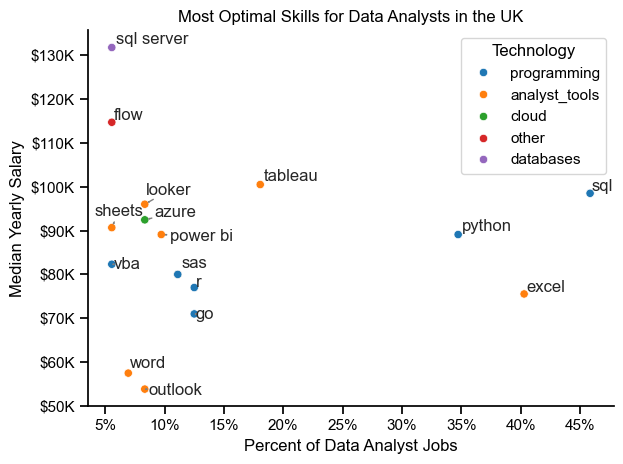

In [34]:
from adjustText import adjust_text
    
#df_plot.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(
  data=df_plot,
  x='skill_percent',
  y='median_salary',
  hue='Technology'
)
sns.despine()
sns.set_theme(style="ticks")
    

   # Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
  texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))
    
# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
    
# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the UK')

from matplotlib.ticker import PercentFormatter
ax =plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals = 0))


    
# Adjust layout and display plot 
plt.tight_layout()
plt.show()